In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Read the csv..
We have stock price data from 31/12/2014 till 31/12/2018... Lets see if we find any pattern in stock price trend...
There are multiple variables in the dataset – date, open, high, low, last, close, total_trade_quantity, and turnover.

The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
High, Low and Last represent the maximum, minimum, and last price of the share for the day.
Volume is the number of shares bought or sold in the day 

The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable. Let’s plot the target variable to understand how it’s shaping up in our data:

In [2]:
AppleDs=pd.read_csv("D:\StockExchange\AppleStockExchange.csv",header=0)
AppleDs1=AppleDs

In [3]:
AppleDs.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,112.820000,113.129997,110.209999,110.379997,102.942894,41403400
1,2015-01-02,111.389999,111.440002,107.349998,109.330002,101.963631,53204600
2,2015-01-05,108.290001,108.650002,105.410004,106.250000,99.091148,64285500
3,2015-01-06,106.540001,107.430000,104.629997,106.260002,99.100471,65797100
4,2015-01-07,107.199997,108.199997,106.699997,107.750000,100.490089,40105900


In [4]:
AppleDs.shape

(1007, 7)

In [5]:
AppleDs['Date'] = pd.to_datetime(AppleDs.Date,format='%Y-%m-%d')

251


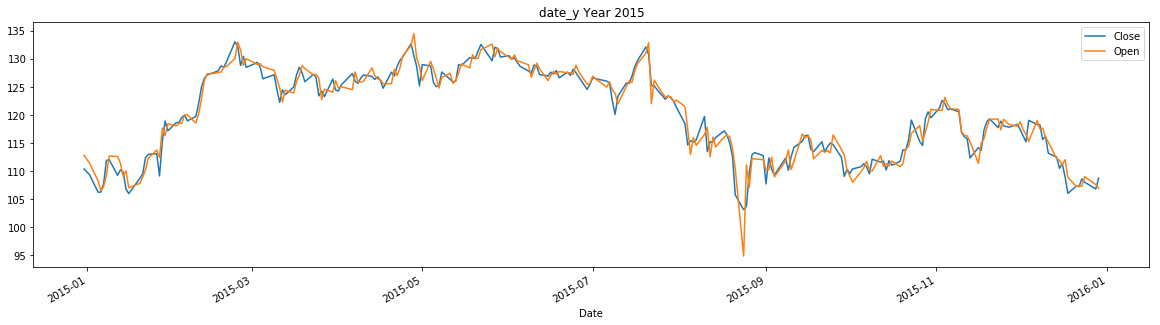

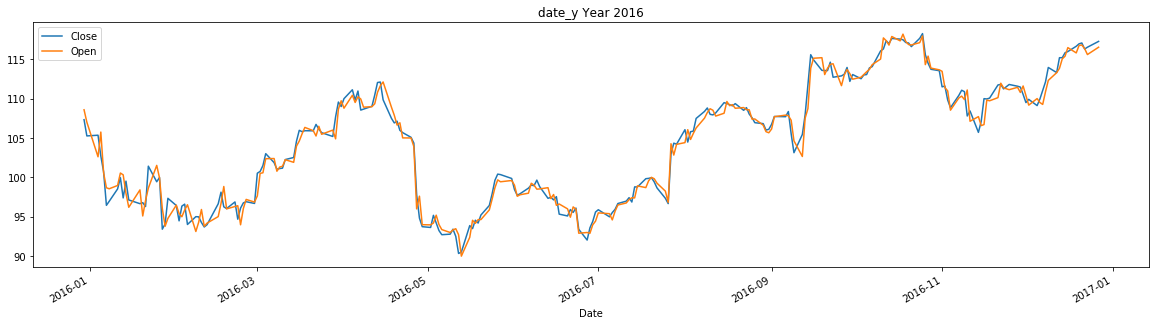

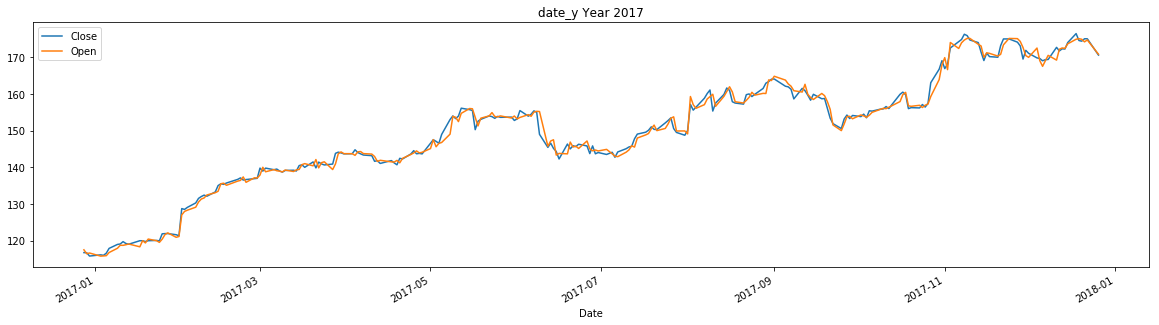

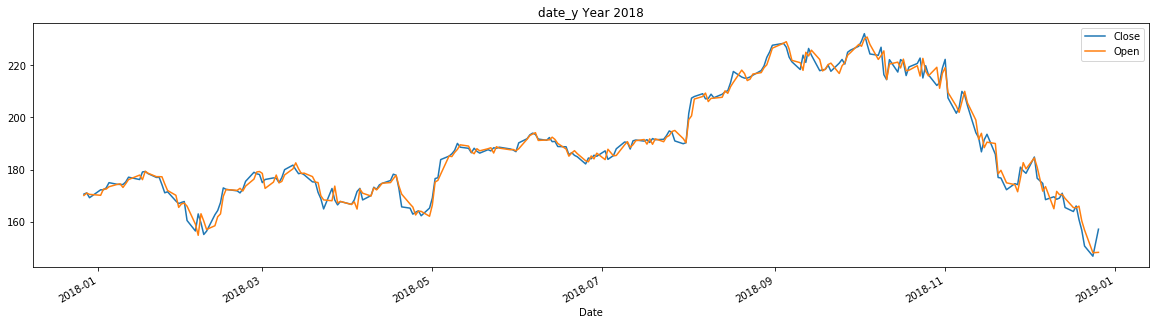

In [6]:
## Lets visualize the data...
# since we have few years data , so for detail analysis lets split it into years 2015-2018
AppleDsDetailedAnalysis = pd.DataFrame()
AppleDsDetailedAnalysis['Close'] = AppleDs.groupby('Date')['Close'].mean()
AppleDsDetailedAnalysis['Open'] = AppleDs.groupby('Date')['Open'].mean()
#AppleDsDetailedAnalysis['High'] = AppleDs.groupby('Date')['High'].mean()
#AppleDsDetailedAnalysis['Low'] = AppleDs.groupby('Date')['Low'].mean()
i = int(len(AppleDsDetailedAnalysis) / 4)
print(i)
fig, ax = plt.subplots(figsize=(15,7))
AppleDsDetailedAnalysis[:i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 2015',ax=ax)
AppleDsDetailedAnalysis[i:2*i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 2016')
AppleDsDetailedAnalysis[2*i:3*i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 2017')
AppleDsDetailedAnalysis[3*i:4*i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 2018')
## from year 2015-2018 the stock market is closing at higher price than it opens on though the margin profit is quiet low.

251


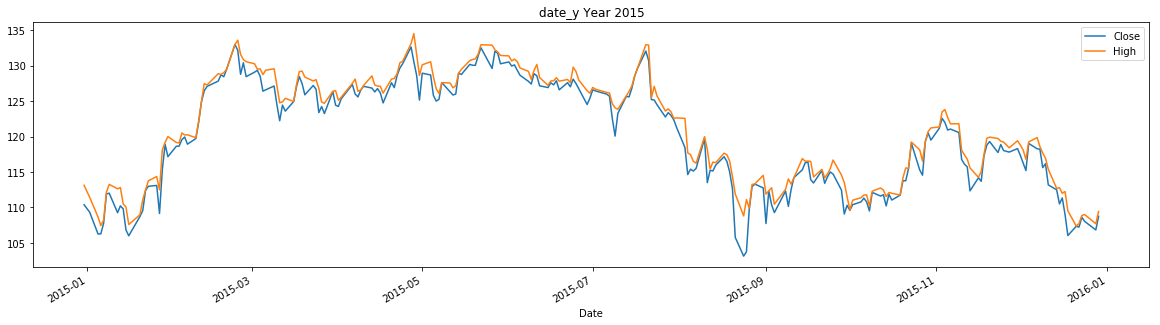

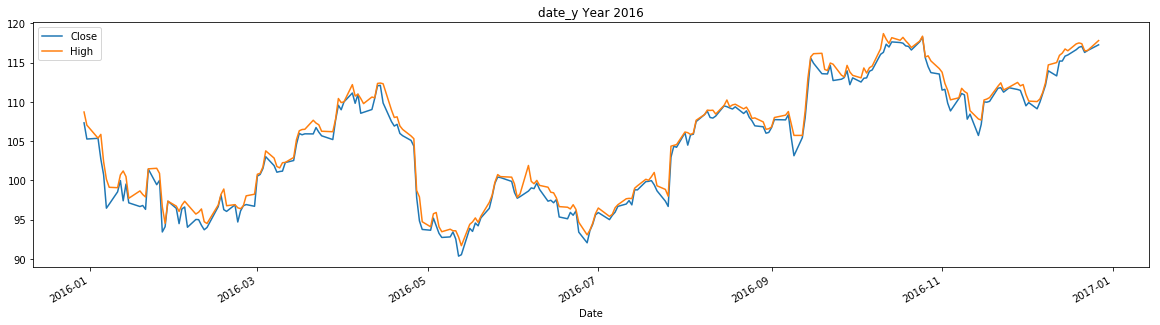

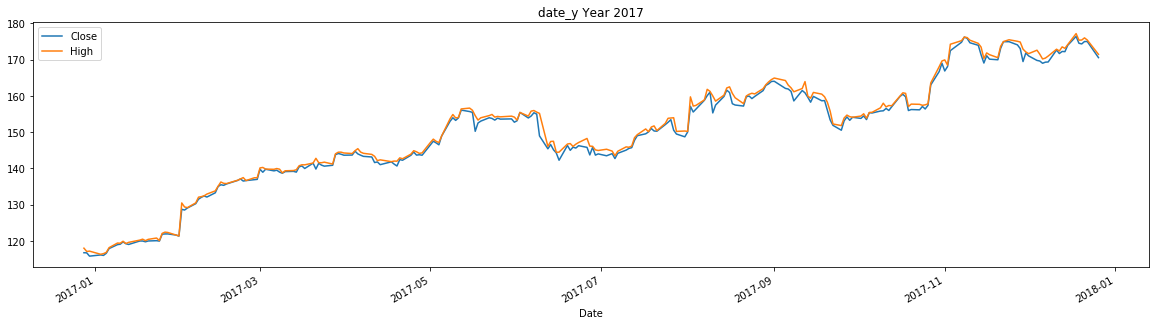

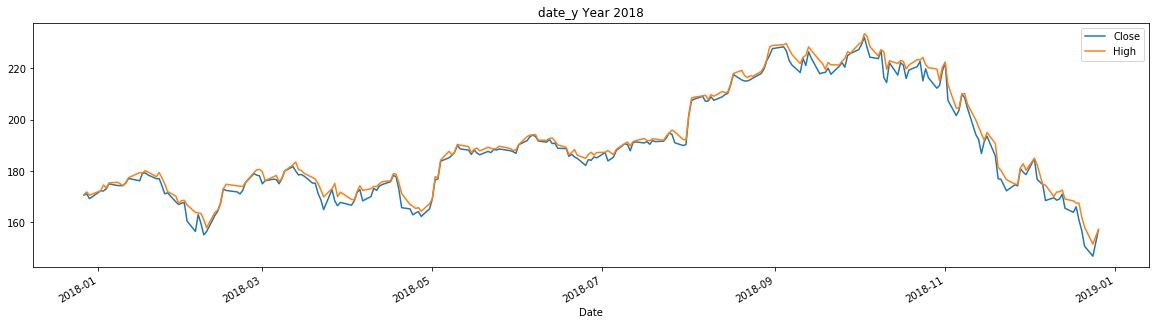

In [7]:
## Lets visualize the data...
# since we have few years data , so for detail analysis lets split it into years 2015-2018
AppleDsDetailedAnalysis = pd.DataFrame()
AppleDsDetailedAnalysis['Close'] = AppleDs.groupby('Date')['Close'].mean()
AppleDsDetailedAnalysis['High'] = AppleDs.groupby('Date')['High'].mean()
i = int(len(AppleDsDetailedAnalysis) / 4)
print(i)
fig, ax = plt.subplots(figsize=(15,7))
AppleDsDetailedAnalysis[:i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 2015',ax=ax)
AppleDsDetailedAnalysis[i:2*i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 2016')
AppleDsDetailedAnalysis[2*i:3*i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 2017')
AppleDsDetailedAnalysis[3*i:4*i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 2018')
## from year 2015-2018 the stock market is closing at comparatevily lesser value than the peak it reaches at that time.

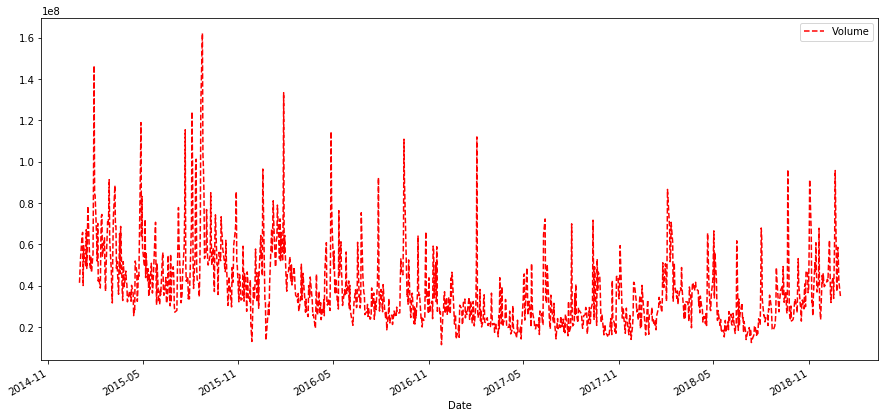

In [8]:
fig, ax = plt.subplots(figsize=(15,7))
AppleDsDetailedAnalysis = pd.DataFrame()
AppleDsDetailedAnalysis['Volume'] = AppleDs.groupby('Date')['Volume'].mean()
AppleDsDetailedAnalysis.plot(ax=ax,color='red', linestyle='dashed',
     markerfacecolor='red', markersize=12)
## distribution of Stocks purchased is quiet constant over time from 2015-2018

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


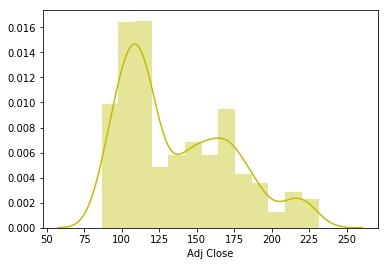

In [9]:
ax = sns.distplot(AppleDs["Adj Close"],color="y") ## Most the stock prices closed at a value of 100-125

In [10]:
### EDA on Apple stock data..

In [11]:
AppleDs.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,112.820000,113.129997,110.209999,110.379997,102.942894,41403400
1,2015-01-02,111.389999,111.440002,107.349998,109.330002,101.963631,53204600
2,2015-01-05,108.290001,108.650002,105.410004,106.250000,99.091148,64285500
3,2015-01-06,106.540001,107.430000,104.629997,106.260002,99.100471,65797100
4,2015-01-07,107.199997,108.199997,106.699997,107.750000,100.490089,40105900


In [12]:
## drop  for duplicate value
AppleDs.drop_duplicates(inplace=True,keep='first')

In [13]:
## check for null values..
AppleDs.apply(lambda x:sum(x.isnull().values),axis=0)    ## no missing values found...

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
## Lets round the values till 2 digits.
AppleDs=np.round(AppleDs,2)

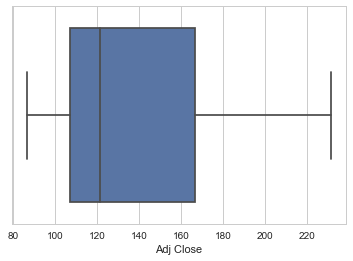

In [15]:
## visualize outliers..
sns.set(style="whitegrid")
ax = sns.boxplot(x=AppleDs["Adj Close"])  ## no outliers found for close tickets..

In [16]:
## lets find the corelation between variables in 

In [17]:
corr=AppleDs.drop('Date', 1).corr()  ## Extremely high corelation among prdictors..

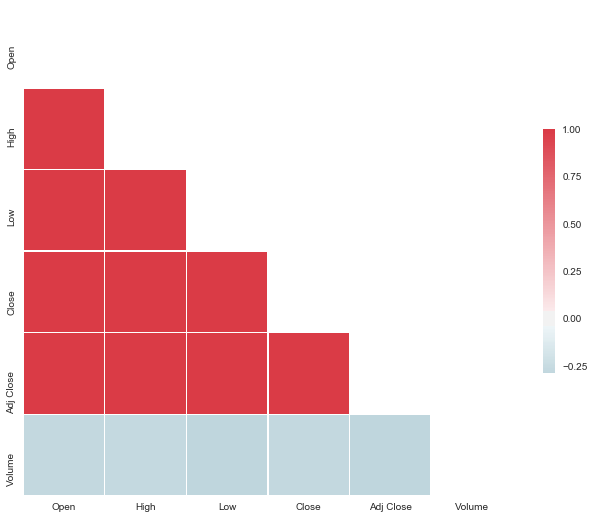

In [18]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
##### Model building..
## split the data into train and test data..
# X_train, X_test, y_train, y_test 
#    = train_test_split(X, y, test_size=0.2, random_state=1)
train_size = int(len(AppleDs) * 0.66)
test_size = int(len(AppleDs) * 0.88)
train, test,CV = AppleDs[0:train_size], AppleDs[train_size:test_size],AppleDs[test_size:len(AppleDs)]

In [20]:
train.shape

(664, 7)

In [21]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,112.82,113.13,110.21,110.38,102.94,41403400
1,2015-01-02,111.39,111.44,107.35,109.33,101.96,53204600
2,2015-01-05,108.29,108.65,105.41,106.25,99.09,64285500
3,2015-01-06,106.54,107.43,104.63,106.26,99.10,65797100
4,2015-01-07,107.20,108.20,106.70,107.75,100.49,40105900


In [22]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
fig_size
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 11
plt.rcParams["figure.figsize"] = fig_size

In [23]:
# Check stationarity of a timeseries..
#Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that 
#the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence
#levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series
#is stationary
# that it is not stationary (has some time-dependent structure). 
#The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.
# p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    plt.rcParams['agg.path.chunksize'] = 1000
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

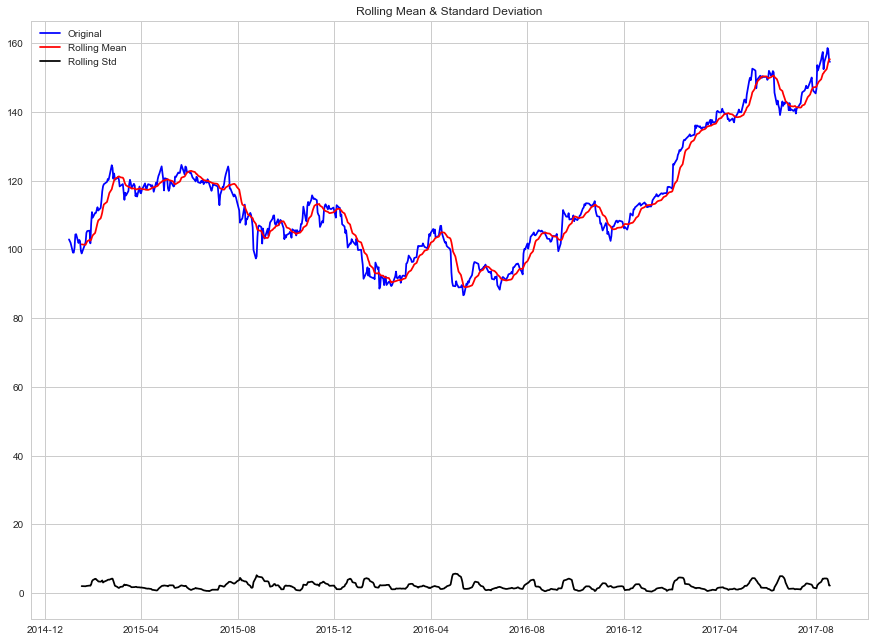

Results of Dickey-Fuller Test:
Test Statistic                  -0.207217
p-value                          0.937656
#Lags Used                       0.000000
Number of Observations Used    663.000000
Critical Value (1%)             -3.440252
Critical Value (10%)            -2.569097
Critical Value (5%)             -2.865909
dtype: float64


In [24]:
train.sort_index(inplace=True)
tsTrain=train.groupby(['Date'])["Adj Close"].mean()
tsTrain.dropna()
test_stationarity(tsTrain)


In [25]:
# as we see the p value > .05 Hense a/c to dickey fuller test, we cant Reject the null hypothesis (H0), the data have a unit root and is not stationary.
# Test Statistic > critical value  hense the data is not  stationary.
# basic idea is to model the trend and seasonality in this series, so we can remove it and make the series stationary.
#Then we can go ahead and apply statistical forecasting to the stationary series
## std dev is quiet low and mean is  incraesing .. hense the data is not  stationary
#### if the data is stationary. hense detrend and removing seasonality is not required...

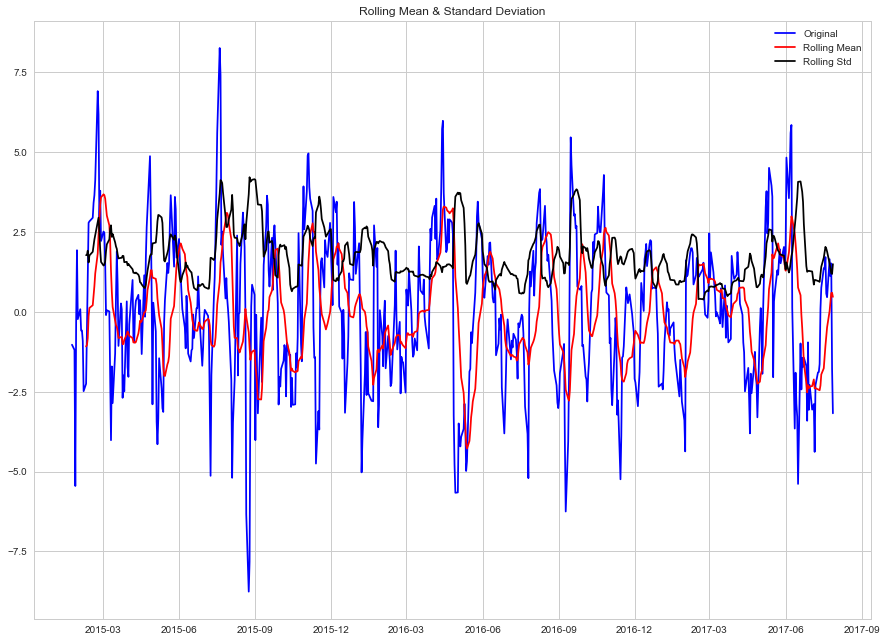

Results of Dickey-Fuller Test:
Test Statistic                -8.382561e+00
p-value                        2.487384e-13
#Lags Used                     9.000000e+00
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (10%)          -2.569243e+00
Critical Value (5%)           -2.866183e+00
dtype: float64


In [26]:
# Decomposing:
#Here we model both the trend and the seasonality, then the remaining part of the time series is returned
from statsmodels.tsa.seasonal import seasonal_decompose
tsTrain.dropna(inplace=True)
decomposition=seasonal_decompose(tsTrain,freq=30)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
ts_decompose=residual
ts_decompose.dropna(inplace=True)
test_stationarity(ts_decompose)  ## the residual is stationary hense its can be considered as a noise,..

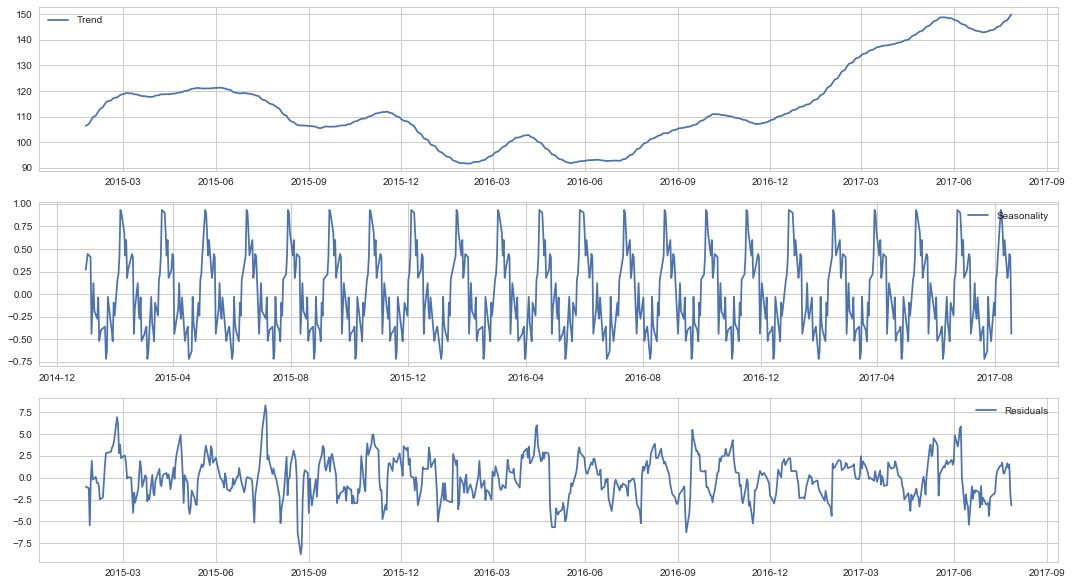

In [27]:
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()  
### we observe that there is an increasing trend in stock close prices and there is a seasonality observed over 4 years
# much noise is also observed in the series.

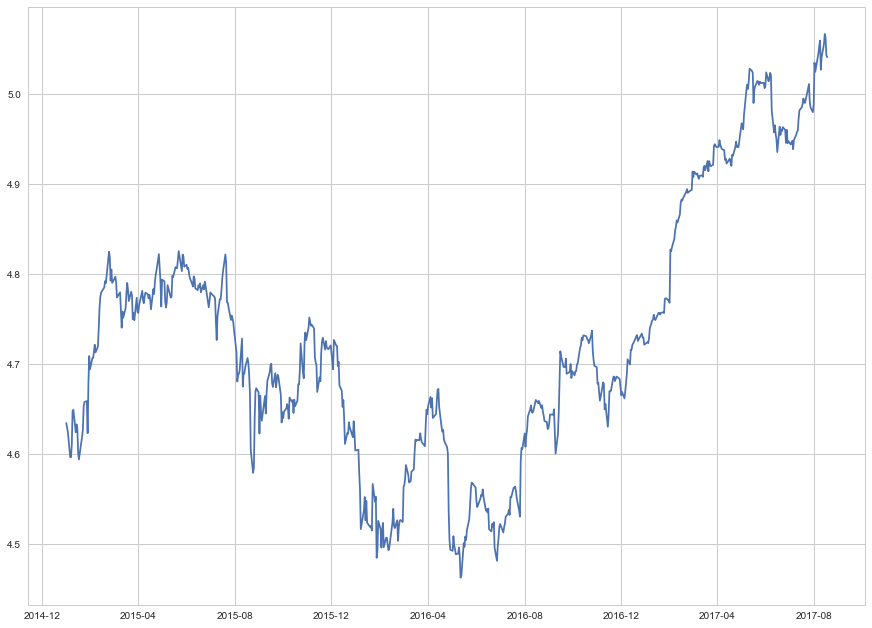

In [28]:
#### Detrend
#reduce the trend using transformation.These transformation can be log, sq-rt, cube root etc .
ts_log=np.log(tsTrain)
plt.plot(ts_log)

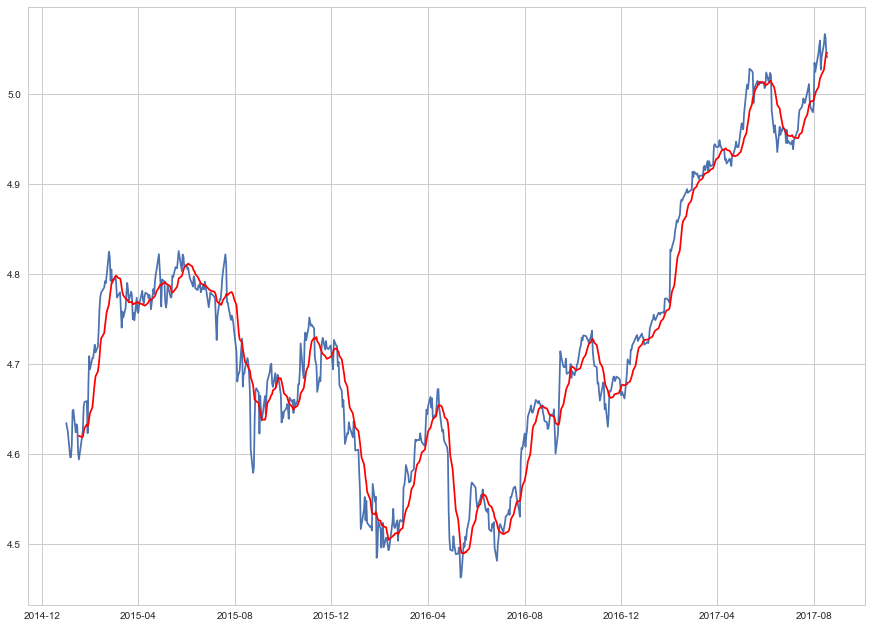

In [29]:
## much noise present , need to model the trend and remove from the series.
## Lets apply MA smoothning...
moving_avg=ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg,color="red")

## Lets subtract rolling mean form the original series and obtain the smoothened data.. 
ts_log_moving_avg_diff=ts_log-moving_avg

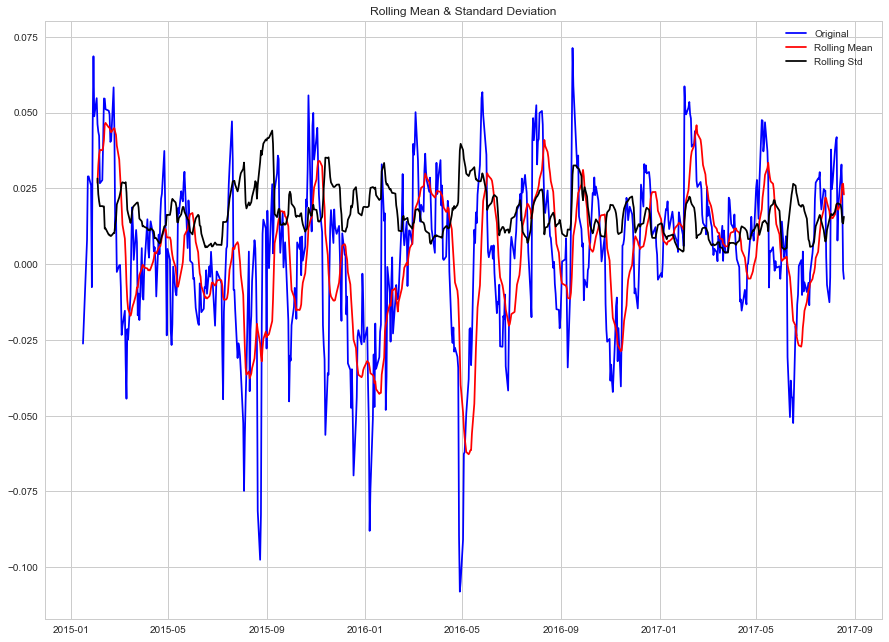

Results of Dickey-Fuller Test:
Test Statistic                -7.044733e+00
p-value                        5.725605e-10
#Lags Used                     1.000000e+00
Number of Observations Used    6.510000e+02
Critical Value (1%)           -3.440435e+00
Critical Value (10%)          -2.569140e+00
Critical Value (5%)           -2.865990e+00
dtype: float64


In [30]:
## Lets check after removing detrend, the series is stationary or not.
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

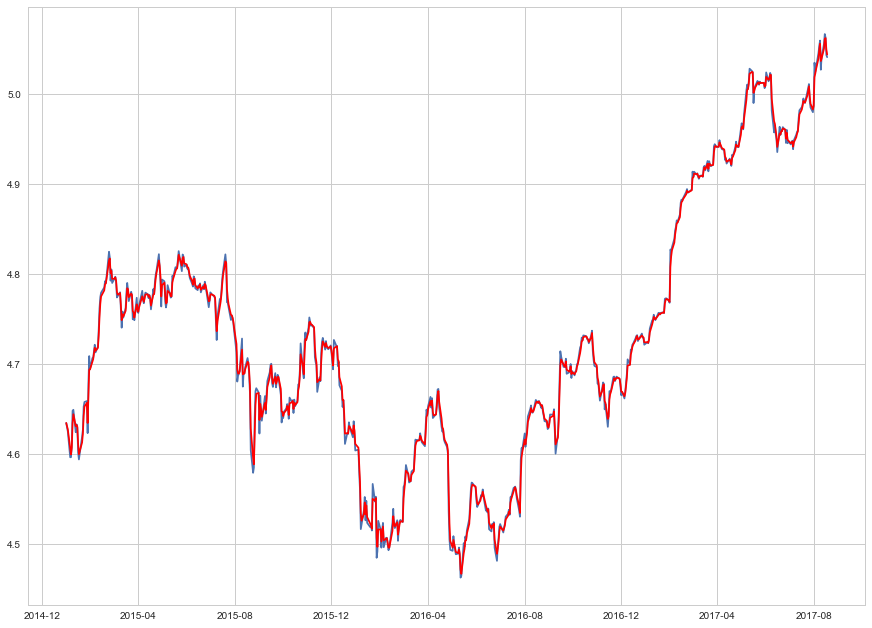

In [31]:
## exponnetial smoothning..
expwighted_avg=ts_log.ewm(com=0.5).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg,color='red')

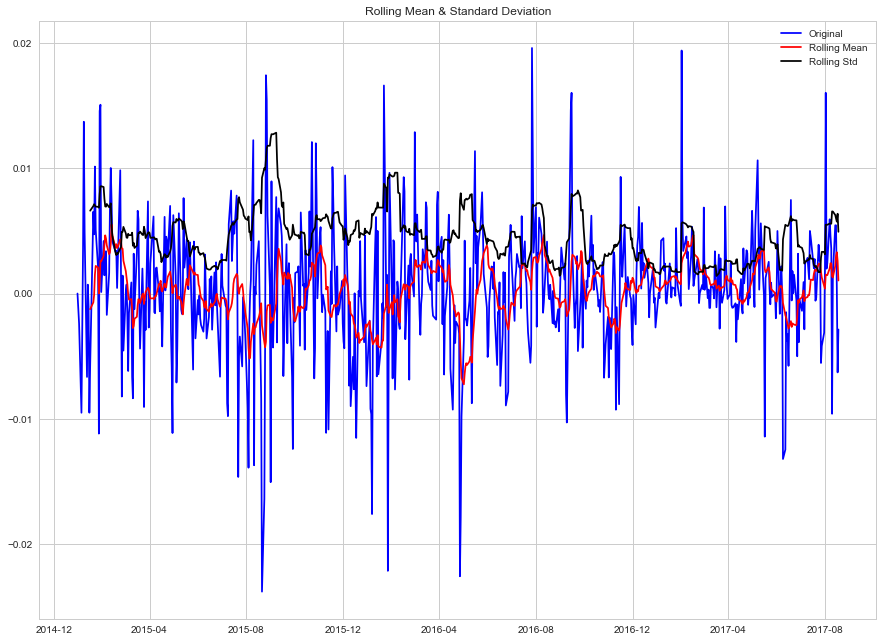

Results of Dickey-Fuller Test:
Test Statistic                -1.828823e+01
p-value                        2.300379e-30
#Lags Used                     0.000000e+00
Number of Observations Used    6.630000e+02
Critical Value (1%)           -3.440252e+00
Critical Value (10%)          -2.569097e+00
Critical Value (5%)           -2.865909e+00
dtype: float64


In [32]:
## Lets check the stationrity 
ts_log_ewma_diff=ts_log-expwighted_avg
test_stationarity(ts_log_ewma_diff)

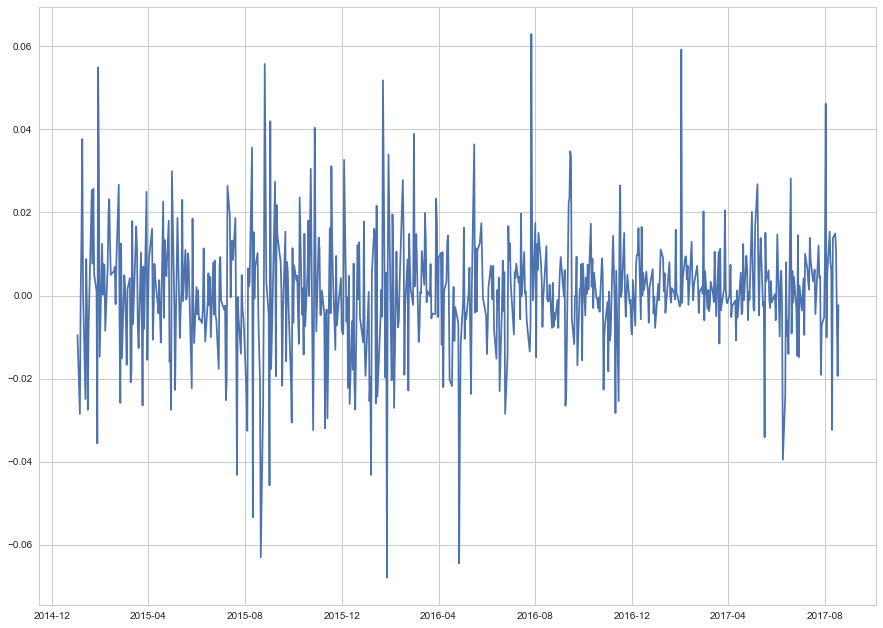

In [33]:
### Remove trend and series by differencing..
#Differencing
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

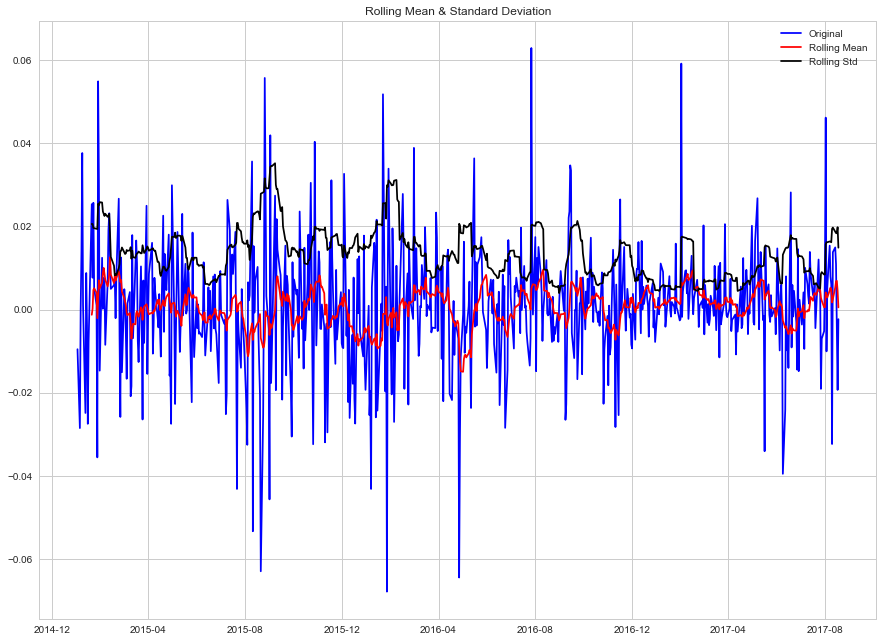

Results of Dickey-Fuller Test:
Test Statistic                 -25.300588
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    662.000000
Critical Value (1%)             -3.440267
Critical Value (10%)            -2.569100
Critical Value (5%)             -2.865916
dtype: float64


In [34]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

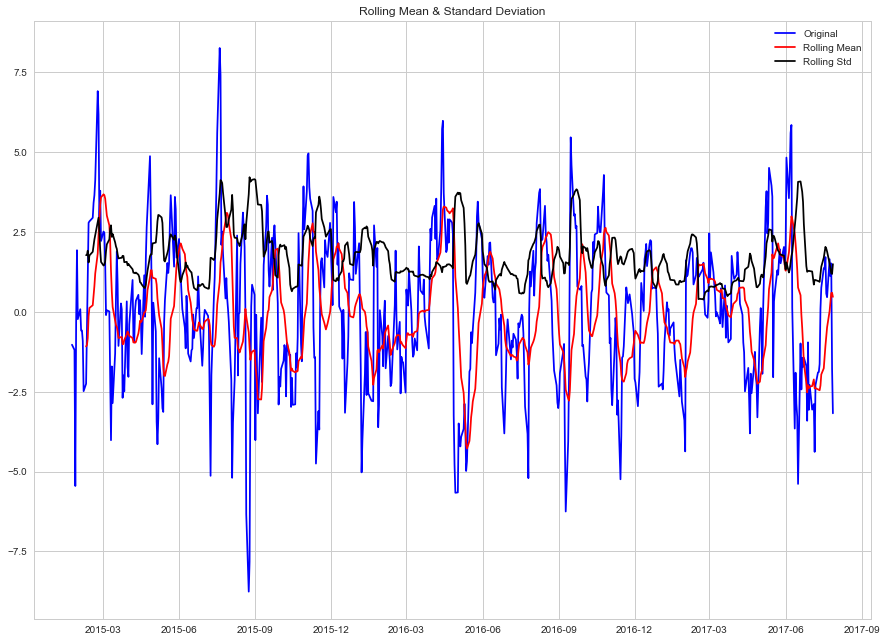

Results of Dickey-Fuller Test:
Test Statistic                -8.382561e+00
p-value                        2.487384e-13
#Lags Used                     9.000000e+00
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (10%)          -2.569243e+00
Critical Value (5%)           -2.866183e+00
dtype: float64


In [35]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

 as we see the p value < .05 Hense a/c to dickey fuller test, we  Reject the null hypothesis (H0),hense  the data doesnt have a unit root and is  stationary.
 Test Statistic < critical value  hense the data is   stationary.
 std dev is quiet low and mean is not incraesing .. hense the data  not  stationary
#### if the data is stationary. hense now more detrend and removing seasonality is not required...

In [36]:
## Forcasting Timeseries.

### Forcasting timeseries
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf
## acf and pacf plots

In [37]:
lag_Acf=acf(ts_log_moving_avg_diff,nlags=20)
lag_Pacf=pacf(ts_log_moving_avg_diff,nlags=20,method='ols')

Text(0.5,1,'Autocorrelation Function')

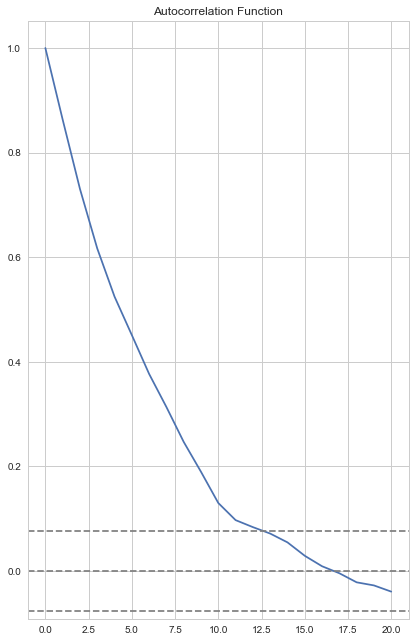

In [38]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_Acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

Text(0.5,1,'Autocorrelation Function')

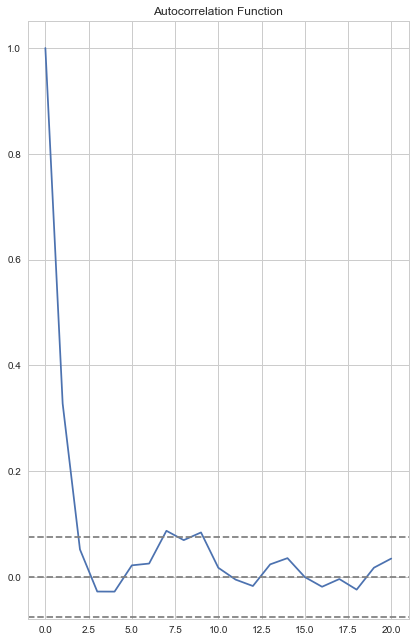

In [39]:
# ts_log_moving_avg_diff
lag_Acf=acf(ts_log_ewma_diff,nlags=20)
lag_Pacf=pacf(ts_log_ewma_diff,nlags=20,method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_Acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_ewma_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_ewma_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

Text(0.5,1,'Autocorrelation Function')

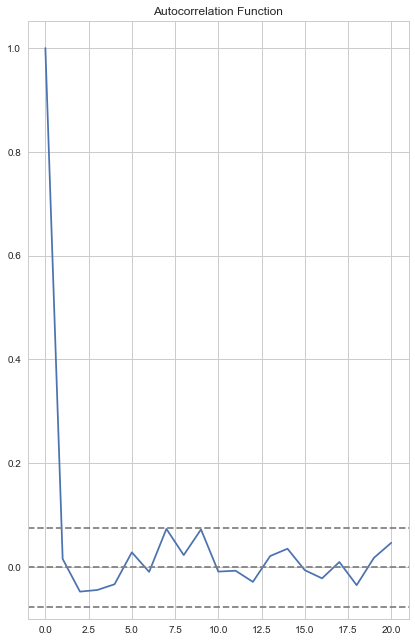

In [40]:
# ts_log_moving_avg_diff
lag_Acf=acf(ts_log_diff,nlags=20)
lag_Pacf=pacf(ts_log_diff,nlags=20,method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_Acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
### p=1

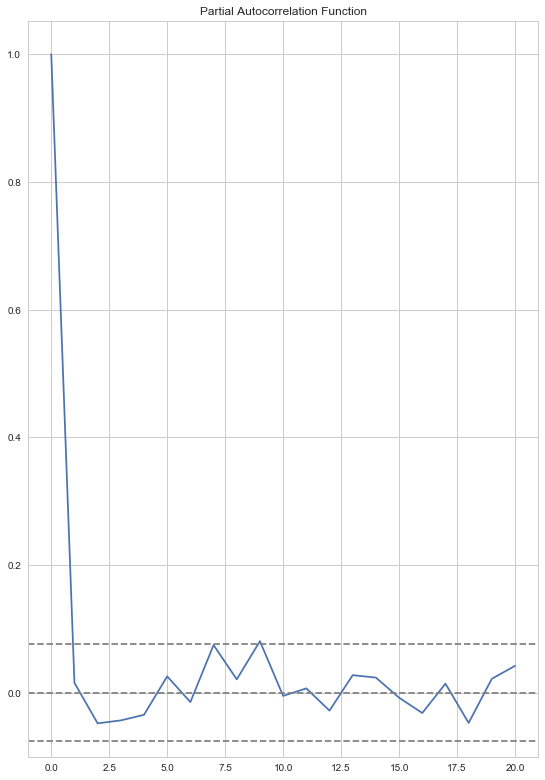

In [41]:
#Plot PACF: 
plt.subplot(122)
plt.plot(lag_Pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
## q=2

Text(0.5,1,'Autocorrelation Function')

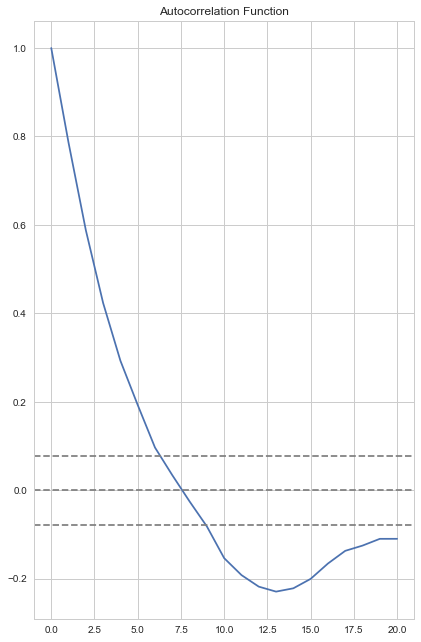

In [42]:
# ts_log_moving_avg_diff
lag_Acf=acf(ts_log_decompose,nlags=20)
lag_Pacf=pacf(ts_log_decompose,nlags=20,method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_Acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_decompose)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_decompose)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [43]:
from statsmodels.tsa.arima_model import ARIMA
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: 0.1460')

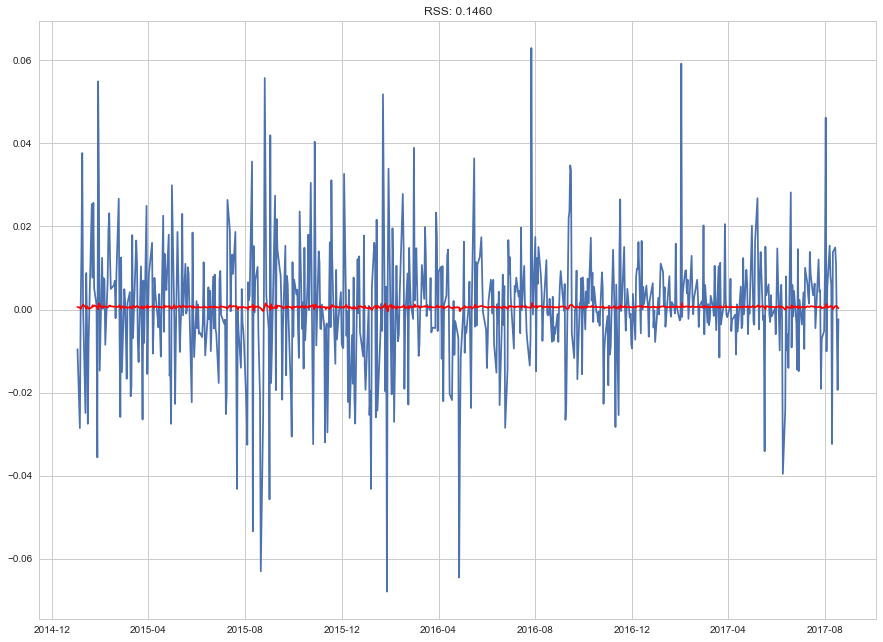

In [44]:
## AR model
model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))


In [45]:
mean_absolute_percentage_error(ts_log_diff,results_AR.fittedvalues)

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


inf

In [46]:
np.mean(np.abs((ts_log_diff - results_AR.fittedvalues) / ts_log_diff)) * 100

inf

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: 0.1457')

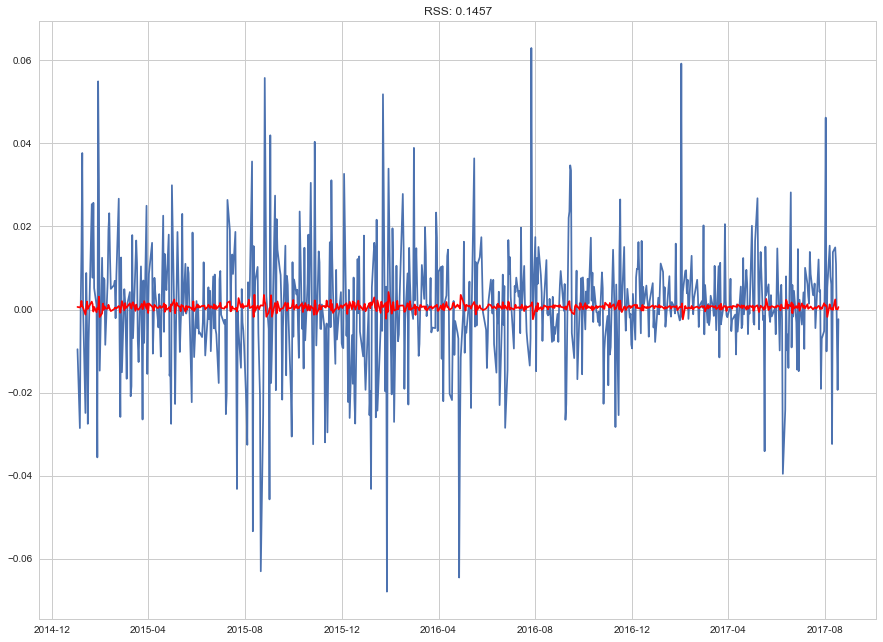

In [47]:
## MA model
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\sbha69\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value en

Text(0.5,1,'RSS: 0.1444')

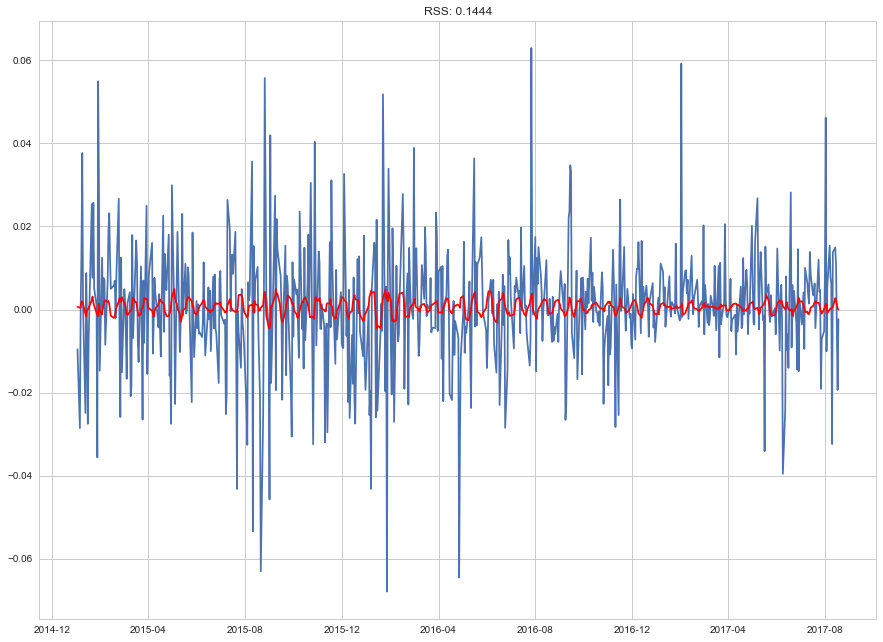

In [48]:
## Combined Model generates Arima..
model = ARIMA(ts_log, order=(3, 1, 2))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))


In [49]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
2015-01-02    0.000617
2015-01-05    0.000459
2015-01-06    0.000508
2015-01-07    0.001949
2015-01-08    0.001943
dtype: float64

In [50]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
2015-01-02    0.000617
2015-01-05    0.001076
2015-01-06    0.001583
2015-01-07    0.003532
2015-01-08    0.005476
dtype: float64

In [51]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2014-12-31    4.634146
2015-01-02    4.634764
2015-01-05    4.635222
2015-01-06    4.635730
2015-01-07    4.637679
dtype: float64

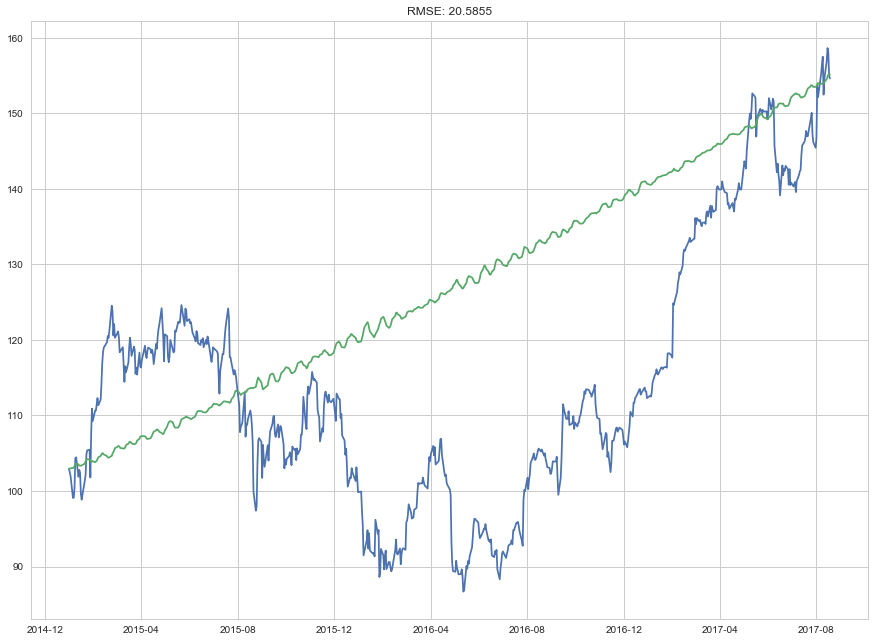

In [52]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(tsTrain)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-tsTrain)**2)/len(tsTrain)))
tsTrain["Predicted value"]=predictions_ARIMA

In [53]:
## Lets test the model on test data..
import datetime
tsTest=test.groupby(['Date'])["Adj Close"].mean()
#pd.to_datetime(AppleDs.Date,format='%Y-%m-%d')
#startdate=datetime.date('2017-08-21',format='%Y-%m-%d')
#endDate=datetime.date('2018-07-09',format='%Y-%m-%d')
#forecastTest = results_ARIMA.predict(startdate,endDate)
startindex=len(tsTrain)
endindex=startindex+224

#from pandas import datetime
#startdate = "2017-08-21" # The date - 29 Dec 2017
#format_str = '%Y-%m-%d' # The format
#start_index = datetime(2017, 8, 21)
#end_index = datetime(2018, 7, 9)
#startdate1 = datetime.datetime.strptime(startdate, format_str)
#endDate = "2018-07-09" #
#endDate1 = datetime.datetime.strptime(endDate, format_str)
#forecastTest = results_ARIMA.predict(start=startdate,end=endDate)

## 

#from pandas import datetime
#start_index = datetime(1990, 12, 25)
#end_index = datetime(1990, 12, 26)
forecastTest = results_ARIMA.predict(start=startindex-1, end=endindex)
#tsTest["Forcasted value"]=forecastTest

###
#forecastTest=results_ARIMA.forecast()
#tsTest["Forcasted value"]=forecastTest

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [54]:
forcasted_ARIMA_diff = pd.Series(forecastTest, copy=True)
forcasted_ARIMA_diff.head()

663    0.000642
664    0.000543
665    0.000338
666    0.000214
667    0.000202
dtype: float64

In [55]:
forcasted_ARIMA_diff_cumsum = forcasted_ARIMA_diff.cumsum()
forcasted_ARIMA_diff_cumsum.head()

663    0.000642
664    0.001184
665    0.001522
666    0.001736
667    0.001938
dtype: float64

In [56]:
forcasted_ARIMA_log = pd.Series(tsTest.ix[0], index=tsTest.index)
forcasted_ARIMA_log = forcasted_ARIMA_log.add(forcasted_ARIMA_diff_cumsum,fill_value=0)
forcasted_ARIMA_log.head()

C:\Users\sbha69\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


2017-08-21    154.33
2017-08-22    154.33
2017-08-23    154.33
2017-08-24    154.33
2017-08-25    154.33
dtype: float64

In [57]:
plt.plot(tsTest[''])
plt.plot(forcasted_ARIMA_log)

KeyError: ''

In [ ]:
##3 Linear regression..
##### Model building..
train_size = int(len(AppleDs) * 0.66)
test_size = int(len(AppleDs) * 0.88)
train, test,CV = AppleDs[0:train_size], AppleDs[train_size:test_size],AppleDs[test_size:len(AppleDs)]
x_train=train.drop('Adj Close',axis=1)
y_train=train['Adj Close']
x_test=test.drop('Adj Close',axis=1)
y_test=test['Adj Close']

In [ ]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train.drop('Date',axis=1),y_train)

In [ ]:
## Results..
#make predictions and find the rmse
preds = model.predict(x_test.drop('Date',axis=1))
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms
### Rms is lower than previous technique.. Liner regrssion has performed well in this case...

In [ ]:
test['Predictions']=0
test['Predictions']=preds
train.index = AppleDs[0:train_size].index
test.index = AppleDs[train_size:test_size].index

plt.plot(train['Adj Close'])
plt.plot(test[['Adj Close', 'Predictions']])

In [ ]:
##  k-Nearest Neighbours
train_size = int(len(AppleDs) * 0.66)
test_size = int(len(AppleDs) * 0.88)
train, test,CV = AppleDs[0:train_size], AppleDs[train_size:test_size],AppleDs[test_size:len(AppleDs)]
x_train=train.drop('Adj Close',axis=1)
y_train=train['Adj Close']
x_test=test.drop('Adj Close',axis=1)
y_test=test['Adj Close']

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [ ]:
#fit the model and make predictions
model.fit(x_train.drop('Date',axis=1),y_train)
predsknn = model.predict(x_test.drop('Date',axis=1))

In [ ]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(predsknn)),2)))
rms
### Rms is little higher as comapared to 

In [ ]:
#plot
test['Predictions'] = 0
test['Predictionsknn'] = predsknn
plt.plot(test[['Adj Close', 'Predictionsknn']])
plt.plot(train['Adj Close'])

In [ ]:
###Prophet
#Prophet, designed and pioneered by Facebook, is a time series forecasting library that requires no data preprocessing and is extremely simple to implement. The input for Prophet is a dataframe with two columns: date and target (ds and y).
#importing prophet
from fbprophet import Prophet

In [67]:
train_size = int(len(AppleDs) * 0.66)
test_size = int(len(AppleDs) * 0.88)
train, test,CV = AppleDs[0:train_size], AppleDs[train_size:test_size],AppleDs[test_size:len(AppleDs)]
x_train=train.drop('Adj Close',axis=1)
y_train=train['Adj Close']
x_test=test.drop('Adj Close',axis=1)
y_test=test['Adj Close']

In [68]:
#fit the model
model = Prophet()
model.fit(train)

NameError: name 'Prophet' is not defined

In [69]:
#predictions
close_prices = model.make_future_dataframe(periods=len(test))
forecast = model.predict(close_prices)

AttributeError: 'GridSearchCV' object has no attribute 'make_future_dataframe'

In [70]:
forecast

NameError: name 'forecast' is not defined

In [71]:
#rmse
forecast_valid = forecast['yhat'][987:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

NameError: name 'forecast' is not defined

In [72]:
#### LSTM
train_size = int(len(AppleDs) * 0.66)
test_size = int(len(AppleDs) * 0.88)
train, test,CV = AppleDs[0:train_size], AppleDs[train_size:test_size],AppleDs[test_size:len(AppleDs)]
x_train=train.drop('Adj Close',axis=1)
y_train=train['Adj Close']
x_test=test.drop('Adj Close',axis=1)
y_test=test['Adj Close']

In [59]:
# create and fit the LSTM network
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))


Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'